# Student Performance Analysis

**Objective:** This project analyzes student performance in secondary education to identify key factors that influence final academic grades. By exploring demographic, social, and academic features, we aim to uncover insights that could help educators support at-risk students.

**Dataset:** The data contains student achievement records in mathematics (`student-mat.csv`). 
* `G1`: First period grade
* `G2`: Second period grade
* `G3`: Final grade (Target Variable)

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Optional, but highly recommended for cleaner charts

# Load the dataset
df = pd.read_csv("student-mat.csv", sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 1. Data Overview & Quality Check
Before diving into analysis, let's understand the shape of our data and ensure there are no missing values that need imputation.

In [112]:
print(f"Dataset Shape: {df.shape}")

# Check data types and non-null counts
df.info()

# Check for missing values
missing_values = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
print(f"Columns with missing values: {missing_values}")

Dataset Shape: (395, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null 

## 2. Exploratory Data Analysis (EDA)
### Student Demographics & Study Habits
Let's look at the distribution of study time, past failures, and living conditions.

In [114]:
# Quick look at categorical distributions
print("Study Time Distribution:\n", df['studytime'].value_counts(), "\n")
print("Past Failures Distribution:\n", df['failures'].value_counts(), "\n")
print("Gender Distribution:\n", df['sex'].value_counts(), "\n")
print("Address (Urban vs Rural) Distribution:\n", df['address'].value_counts())

Study Time Distribution:
 studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64 

Past Failures Distribution:
 failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64 

Gender Distribution:
 sex
F    208
M    187
Name: count, dtype: int64 

Address (Urban vs Rural) Distribution:
 address
U    307
R     88
Name: count, dtype: int64


### Target Variable: Final Grade (G3)
The final grade (`G3`) is our primary variable of interest. Let's analyze its distribution.

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

Variance: 20.99


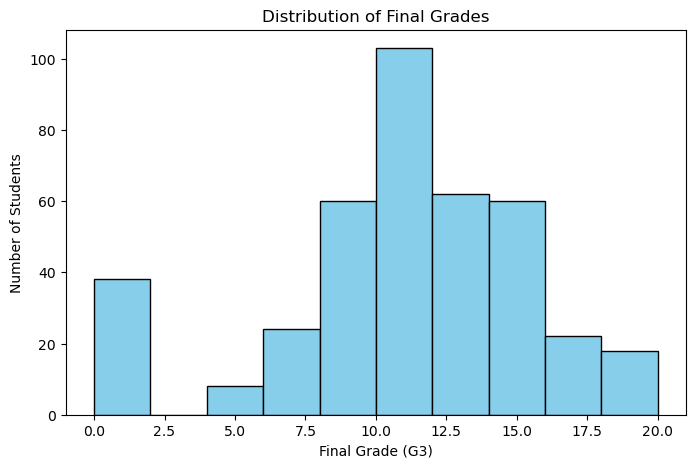

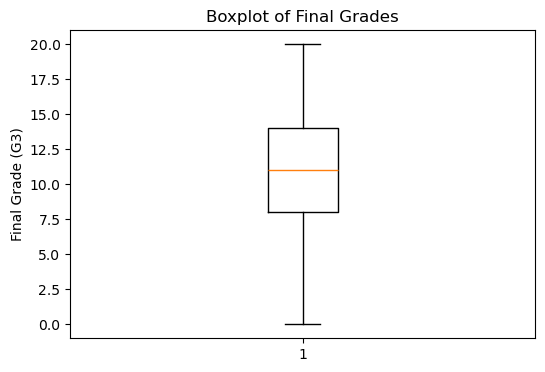

In [116]:
# Summary statistics for the final grade
display(df['G3'].describe())
print(f"Variance: {df['G3'].var():.2f}")

# Distribution of Final Grades
plt.figure(figsize=(8, 5))
plt.hist(df['G3'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of Final Grades")
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(6, 4))
plt.boxplot(df['G3'])
plt.ylabel("Final Grade (G3)")
plt.title("Boxplot of Final Grades")
plt.show()

**Observation:** The mean final grade is approximately 10.4, with a moderate spread (standard deviation ≈ 4.6). The histogram reveals a noticeable peak at very low scores (0–2.5), indicating a group of students with extremely poor performance.

### Correlation Between Exam Scores
Next, we evaluate how strongly the intermediate grades (`G1` and `G2`) predict the final grade (`G3`).#

,G1,G2,G3
G1,1.000000,0.852118,0.801468
G2,0.852118,1.000000,0.904868
G3,0.801468,0.904868,1.000000


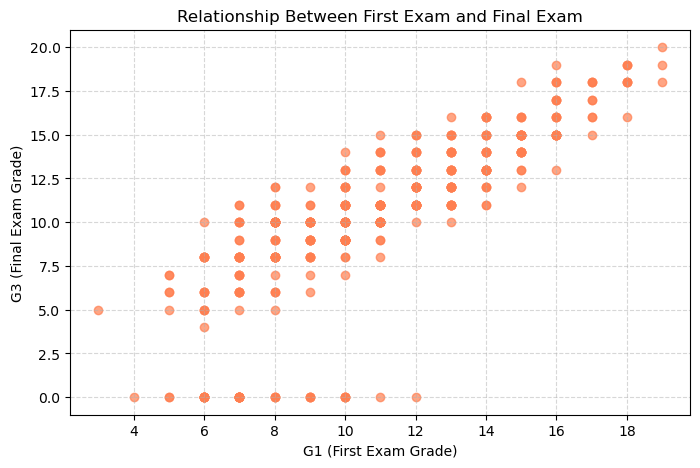

In [119]:
# Calculate correlation matrix for the grades
grade_corr = df[['G1','G2','G3']].corr()
display(grade_corr)

# Scatter plot: First Exam vs Final Exam
plt.figure(figsize=(8, 5))
plt.scatter(df['G1'], df['G3'], alpha=0.7, color='coral')
plt.xlabel("G1 (First Exam Grade)")
plt.ylabel("G3 (Final Exam Grade)")
plt.title("Relationship Between First Exam and Final Exam")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 3. Conclusion & Next Steps
* **Strong Predictors:** Prior academic results (`G1` and `G2`) are highly correlated with the final grade (`G3`), making them the strongest predictors of success.
* **Data Prep Required:** Several columns (like `sex`, `address`, and `internet`) are categorical and will require encoding before training any machine learning models.
* **Next Steps:** With more data, we could explore non-linear models, interaction effects between study time and failures, and temporal modeling to capture performance improvement trends across exams.

## Regression Analysis – Predicting Final Grade (G3)

In this section, we build a linear regression model to predict a student's final grade (G3) using prior academic performance and behavioral features. This helps quantify how different factors contribute to final outcomes.

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Feature selection
X = df[['G1', 'G2', 'failures', 'studytime', 'absences']]
y = df['G3']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions
y_pred = reg_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

r2, mae

(0.7821754247320557, 1.3394159082670907)

**Regression Results**

- The model achieves a strong R² score, indicating that a large portion of the variance in final grades is explained.
- Mean Absolute Error (MAE) shows that predictions are, on average, within a small margin of the true grade.
- Prior academic scores (G1 and G2) dominate prediction performance, while behavioral features contribute marginally.

In [128]:
coefficients = pd.Series(reg_model.coef_, index=X.columns)
coefficients

G1           0.144463
G2           0.979615
failures    -0.455813
studytime   -0.071231
absences     0.039245
dtype: float64

Regression coefficients show that G2 is the strongest positive contributor, while past failures negatively impact final performance.

## Classification Analysis – Predicting Pass / Fail

The problem is reframed as a classification task by defining a binary target variable indicating whether a student passes (G3 ≥ 10) or fails. This formulation is useful for academic decision-making scenarios.

In [131]:
# Create binary target
df['pass'] = (df['G3'] >= 10).astype(int)

X = df[['G1', 'G2', 'failures', 'studytime', 'absences']]
y = df['pass']

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

accuracy, cm

(0.8734177215189873,
 array([[23,  3],
        [ 7, 46]], dtype=int64))

**Classification Results**

- The model achieves high accuracy in predicting pass/fail outcomes.
- The confusion matrix shows that most passing students are correctly identified, with few false positives.
- This indicates that the model is conservative and avoids incorrectly passing weak students.

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        26
           1       0.94      0.87      0.90        53

    accuracy                           0.87        79
   macro avg       0.85      0.88      0.86        79
weighted avg       0.88      0.87      0.88        79



Precision and recall values show a strong balance between identifying successful students and minimizing incorrect pass predictions.